In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
!git clone -q https://github.com/xelaphon/solar-cup.git
load_data_kW = pd.read_csv("solar-cup/kW_clean.csv", low_memory = False)
load_data_kWh = pd.read_csv("solar-cup/kWh_clean.csv", low_memory = False)

In [ ]:

import math
month_labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

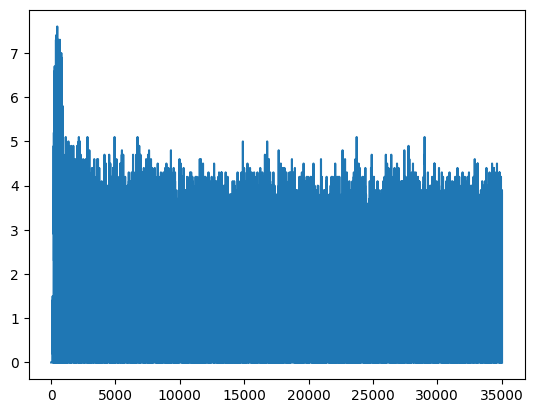

In [ ]:
time = np.linspace(0, 35039, 35040)
plt.plot(time, load_data_kWh[load_data_kWh.columns[42]])

In [ ]:
def average_day_range(i, start_date, end_date):
  plt.figure(figsize=(15, 10))
  x_array = np.array([])
  y_array = np.array([])
  start_num = start_date
  end_num = end_date
  building = load_data_kWh[load_data_kWh.columns[i]]
  for k in range(96):
    sum = 0
    count = 0
    for j in range(start_num, end_num+1):
      sum += building[j*96+k]
      # print(j*96+k)
      count += 1
    # x_array = np.append(x_array, k)
    x_array = np.append(x_array, "{:02.0f}:{:02.0f}".format(math.floor(k/4), 15*(k%4)))
    y_array = np.append(y_array, sum/count)
  plt.plot(x_array, y_array)
  plt.xticks(np.arange(0, 95, 4), x_array[0::4])
  plt.ylabel("kWh")
  plt.title(load_data_kWh.columns[i])

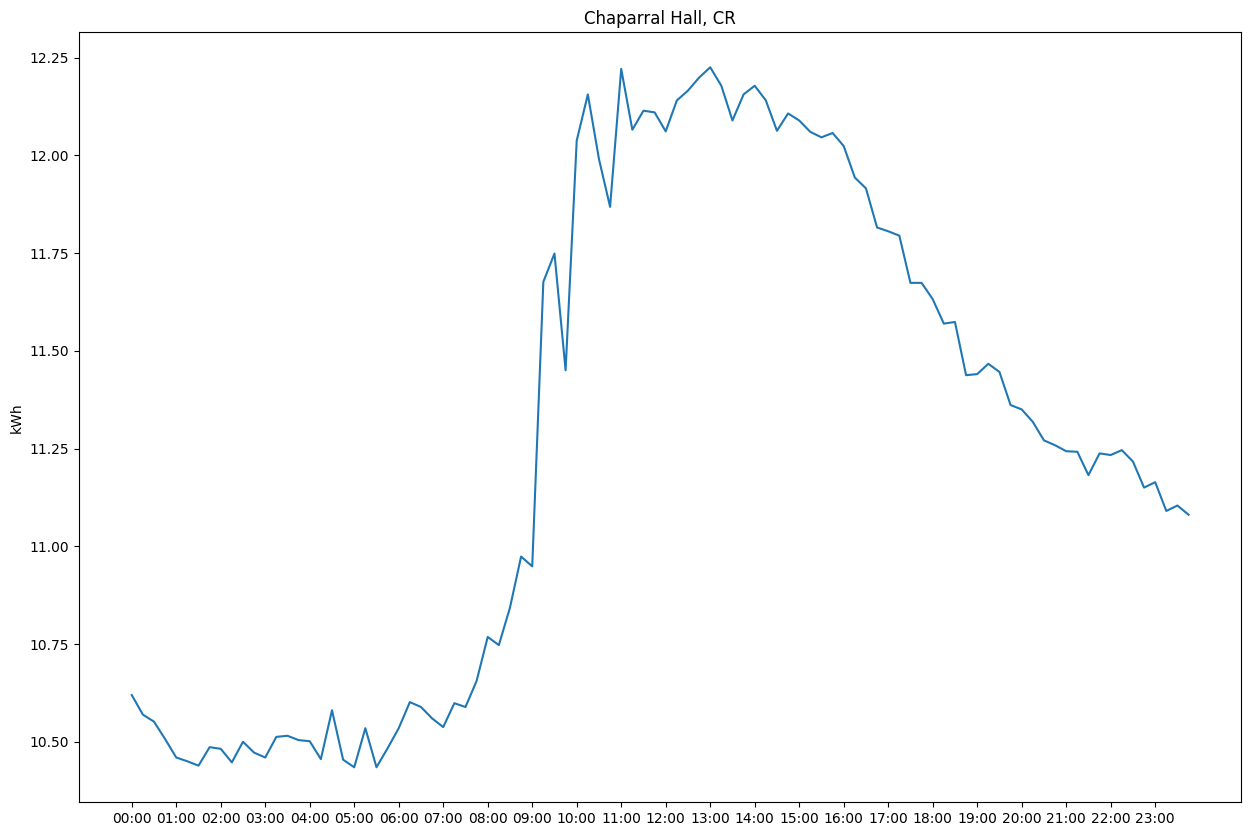

In [ ]:
average_day_range(11, 0, 71)

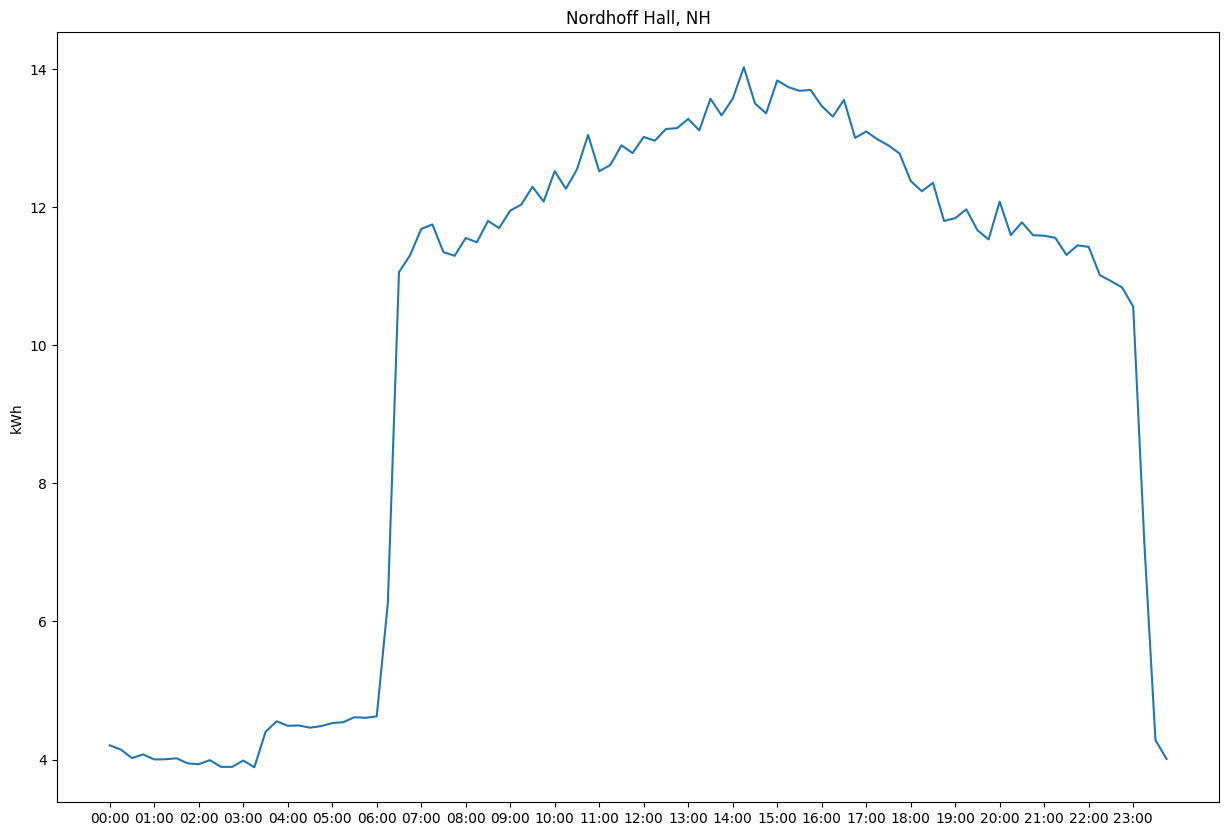

In [ ]:
average_day_range(25, 72, 310)

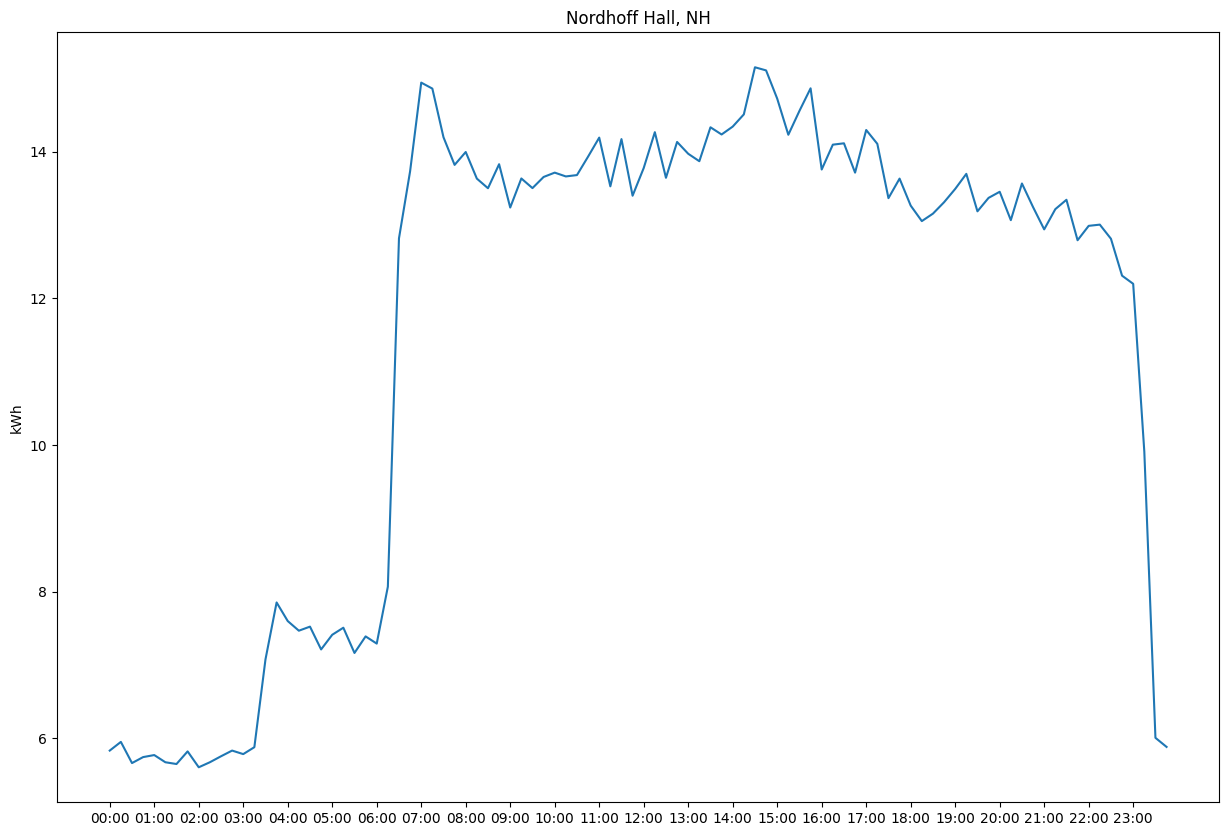

In [ ]:
average_day_range(25, 311, 364)

In [ ]:
load_data_kWh.columns[30]

'Parking Structure B3, PS: B3'

In [ ]:
def average_kWh_group(i_list, start_date, end_date):
  plt.figure(figsize=(20, 10))
  start_num = start_date
  end_num = end_date
  for i in i_list:
    x_array = np.array([])
    y_array = np.array([])
    building = load_data_kWh[load_data_kWh.columns[i]]
    name = load_data_kWh.columns[i]
    for k in range(96):
      sum = 0
      count = 0
      for j in range(start_num, end_num+1):
        sum += building[j*96+k]
        # print(j*96+k)
        count += 1
      # x_array = np.append(x_array, k)
      x_array = np.append(x_array, "{:02.0f}:{:02.0f}".format(math.floor(k/4), 15*(k%4)))
      y_array = np.append(y_array, sum/count)
    plt.plot(x_array, y_array, label = name)
  plt.xticks(np.arange(0, 95, 4), x_array[0::4])
  plt.ylabel("kWh")
  plt.legend(loc = "best")
  # plt.title(load_data_kWh.columns[i])

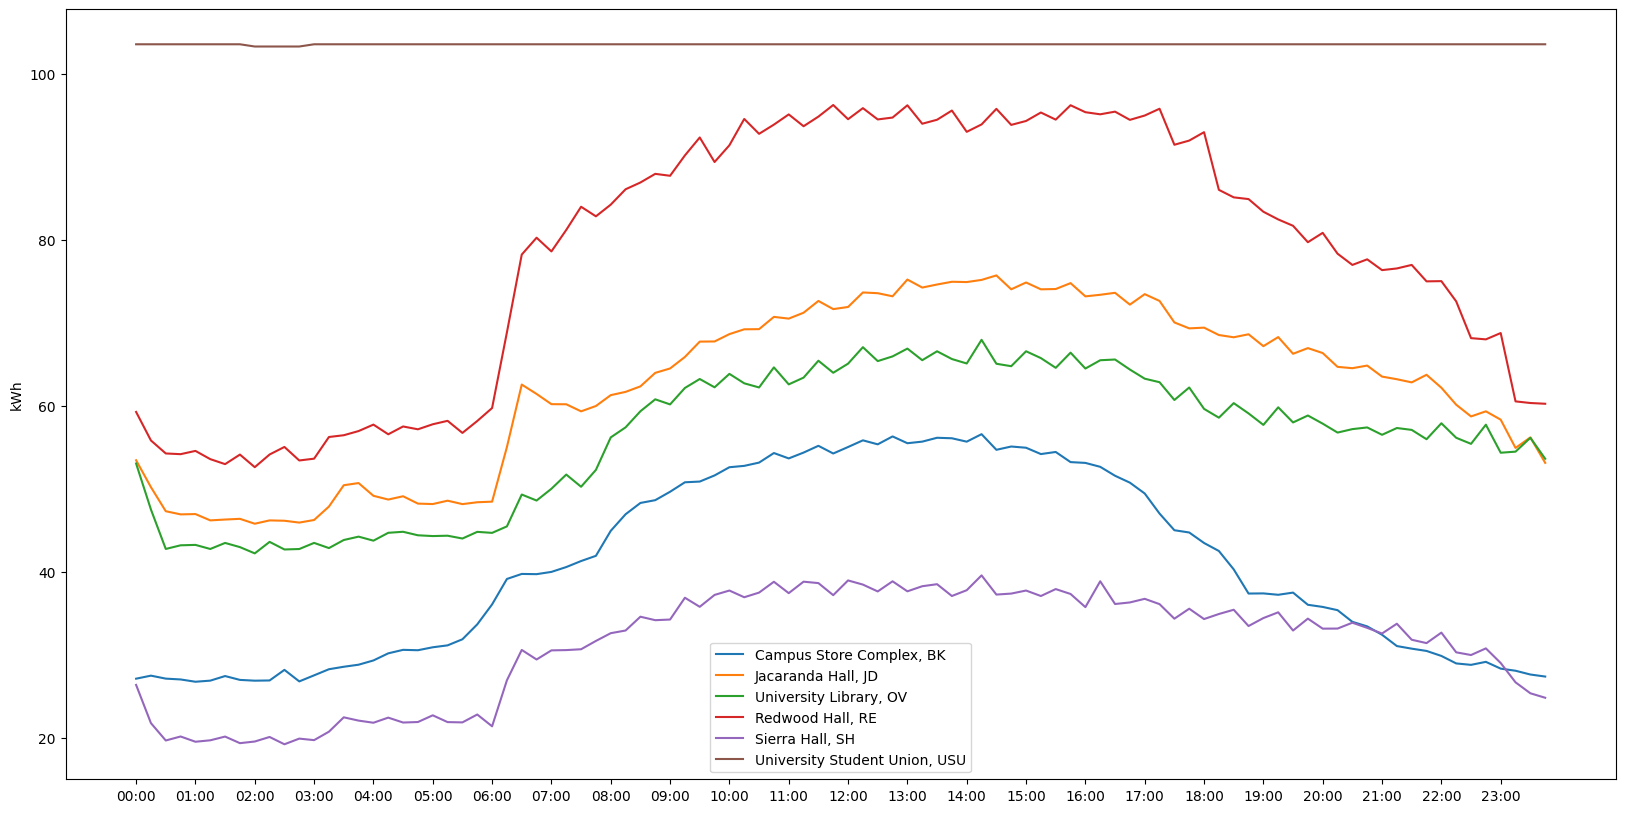

In [ ]:
average_kWh_group((9, 16, 26, 33, 35, 40), 0, 364)

In [ ]:
def average_kW_group(i_list, start_date, end_date):
  plt.figure(figsize=(20, 10))
  start_num = start_date
  end_num = end_date
  for i in i_list:
    x_array = np.array([])
    y_array = np.array([])
    building = load_data_kW[load_data_kWh.columns[i]]
    name = load_data_kW.columns[i]
    for k in range(96):
      sum = 0
      count = 0
      for j in range(start_num, end_num+1):
        sum += building[j*96+k]
        # print(j*96+k)
        count += 1
      # x_array = np.append(x_array, k)
      x_array = np.append(x_array, "{:02.0f}:{:02.0f}".format(math.floor(k/4), 15*(k%4)))
      y_array = np.append(y_array, sum/count)
    plt.plot(x_array, y_array, label = name)
  plt.xticks(np.arange(0, 95, 4), x_array[0::4])
  plt.ylabel("kW")
  plt.legend(loc = "best")
  plt.title("Daily load profile")

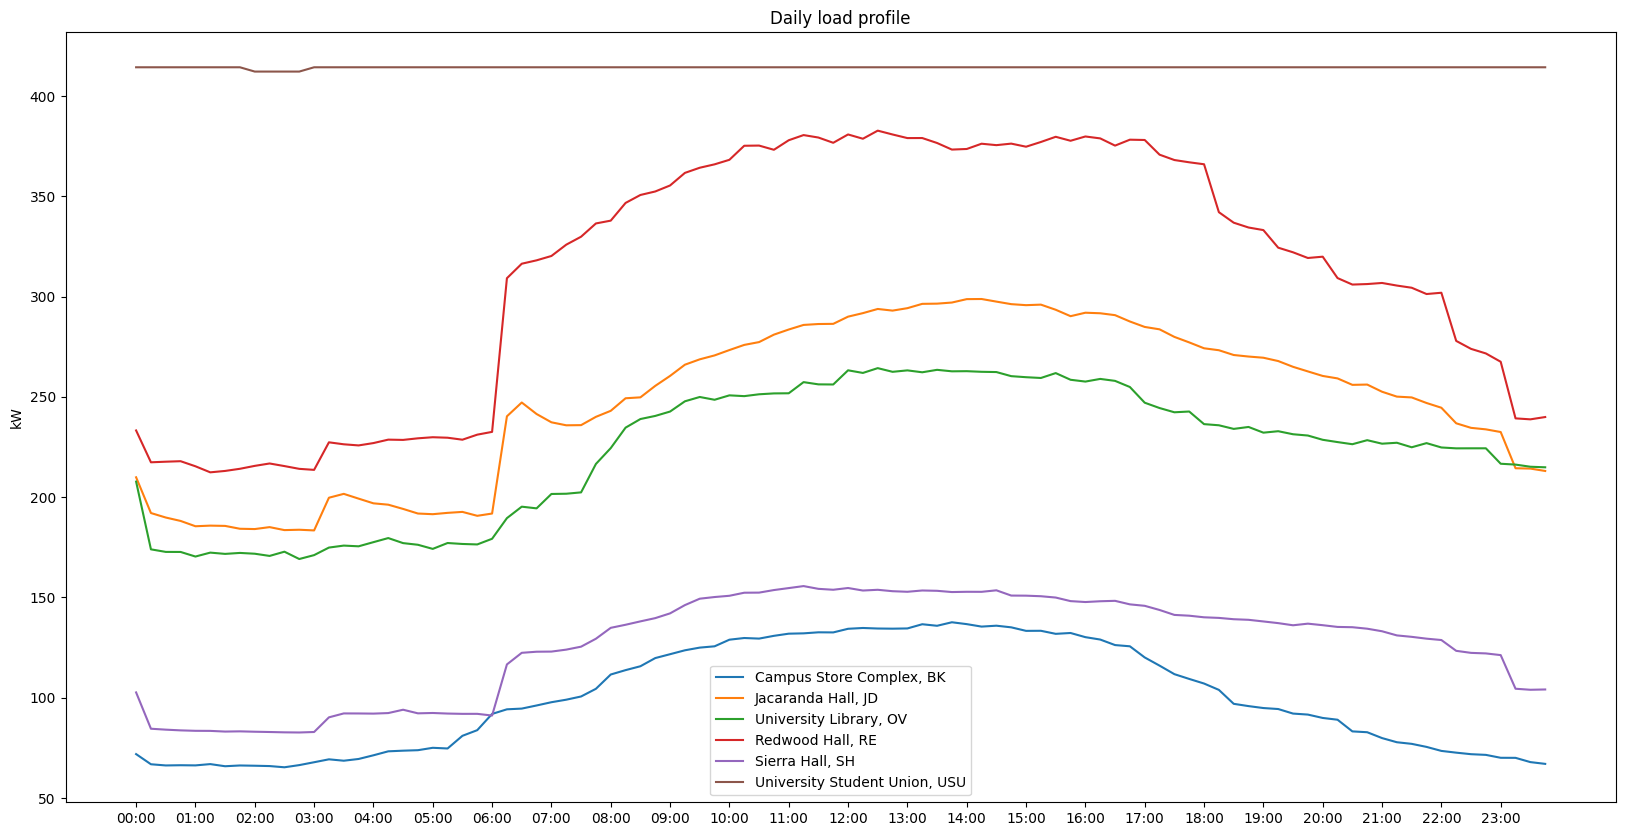

In [ ]:
average_kW_group((9, 16, 26, 33, 35, 40), 0, 364)

In [ ]:
def average_day_range_kW(i, start_date, end_date):
  x_array = np.array([])
  y_array = np.array([])
  start_num = start_date
  end_num = end_date
  building = load_data_kW[load_data_kWh.columns[i]]
  for k in range(96):
    sum = 0
    count = 0
    for j in range(start_num, end_num+1):
      sum += building[j*96+k]
      # if building[j*96+k] > 200:
      #   print(building[j*96+k])
      count += 1
    # x_array = np.append(x_array, k)
    x_array = np.append(x_array, "{:02.0f}:{:02.0f}".format(math.floor(k/4), 15*(k%4)))
    y_array = np.append(y_array, sum/count)
  plt.figure(figsize=(20, 10))
  plt.plot(x_array, y_array)
  plt.xticks(np.arange(0, 95, 4), x_array[0::4])
  plt.ylabel("kW")
  plt.title(load_data_kWh.columns[i])

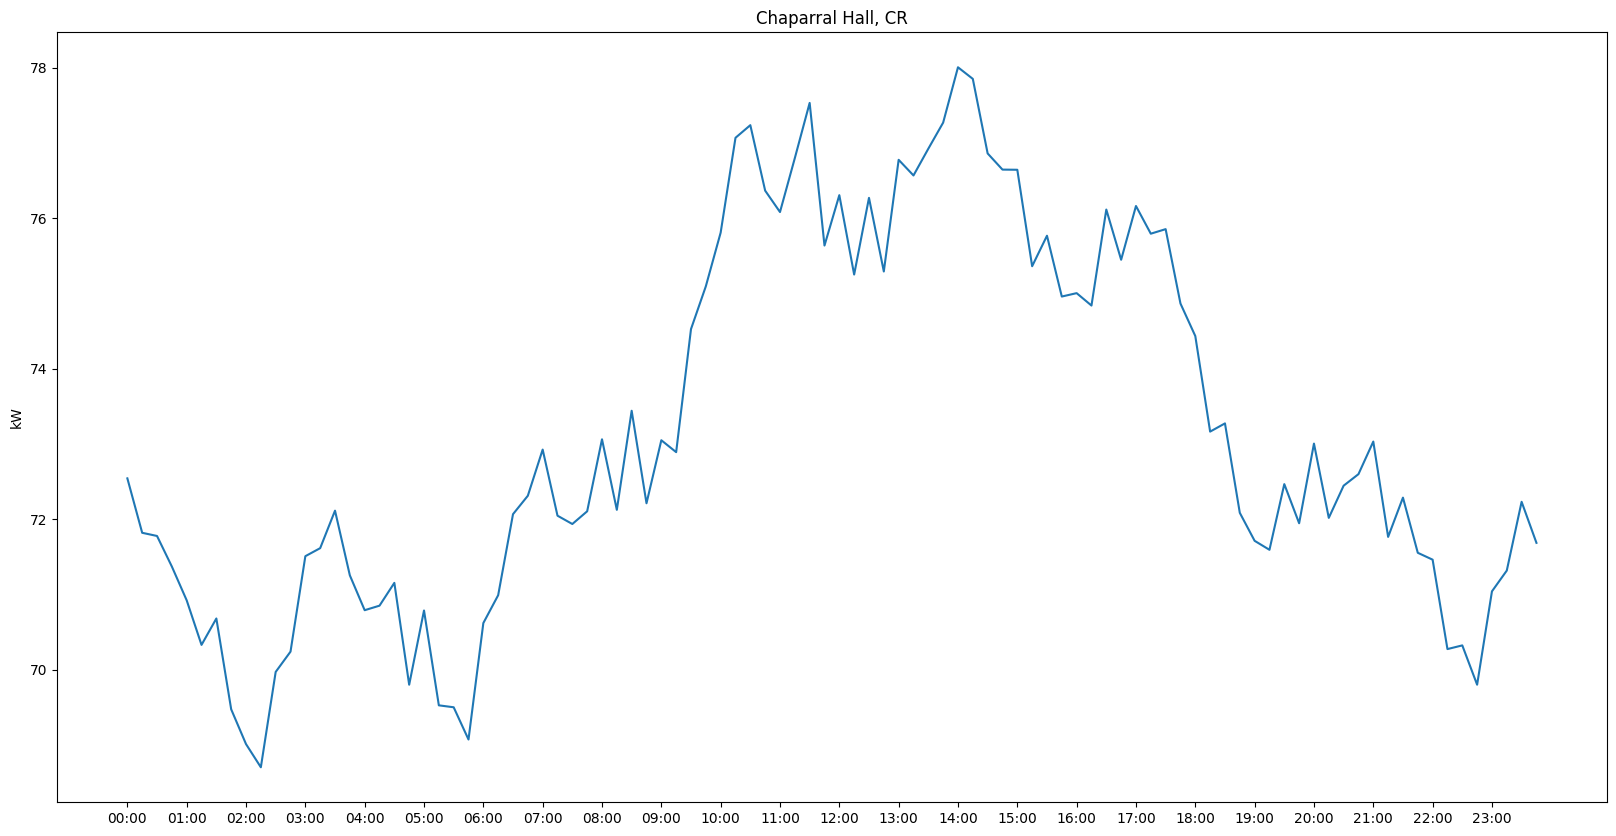

In [ ]:
average_day_range_kW(11, 0, 364)

- max load day per month, with one line per month and a separate graph for each building, across a day, so every timestamp's max in a month - is this practical?
- across a year, show each building's avg

In [ ]:
columns = load_data_kWh.columns[5:]
cost_columns = np.empty(38*3, dtype = object)
for k in range(38):
  cost_columns[k*3] = columns[k] + ", Usage Cost"
  cost_columns[k*3 + 1] = columns[k] + ", Demand Cost"
  cost_columns[k*3 + 2] = columns[k] + ", Percentage demand of total"
cost_columns

array(['Art and Design Center, ADC, Usage Cost',
       'Art and Design Center, ADC, Demand Cost',
       'Art and Design Center, ADC, Percentage demand of total',
       'Arbor Grill, AR, Usage Cost', 'Arbor Grill, AR, Demand Cost',
       'Arbor Grill, AR, Percentage demand of total',
       'Bookstein Hall, BB, Usage Cost',
       'Bookstein Hall, BB, Demand Cost',
       'Bookstein Hall, BB, Percentage demand of total',
       'Bayramian Hall, BH, Usage Cost',
       'Bayramian Hall, BH, Demand Cost',
       'Bayramian Hall, BH, Percentage demand of total',
       'Campus Store Complex, BK, Usage Cost',
       'Campus Store Complex, BK, Demand Cost',
       'Campus Store Complex, BK, Percentage demand of total',
       'Donald Bianchi Planetarium, BP, Usage Cost',
       'Donald Bianchi Planetarium, BP, Demand Cost',
       'Donald Bianchi Planetarium, BP, Percentage demand of total',
       'Chaparral Hall, CR, Usage Cost',
       'Chaparral Hall, CR, Demand Cost',
       'Chaparr

In [ ]:
len(cost_columns)

114

In [ ]:
buildings = 38
index_EV = 37
cost = np.zeros((12, buildings*3))
kW_max_year = 0
kW_max_year_location = 0
kW_max_month = 0
for k in range(35040):
  month = int(load_data_kWh["Month"][k])-1 # it's 1-indexed in the spreadsheet but needs to be 0-indexed here
  hour = load_data_kWh["Hour"][k]
  week = load_data_kWh["Week"][k]
  kW_temp_total = 0 # for each timestamp, the total kW of all buildings
  kW_charges = np.zeros(buildings)
  for b in range(buildings):
    kWh = load_data_kWh[load_data_kWh.columns[b+5]][k]
    kW = load_data_kW[load_data_kW.columns[b+5]][k]
    kWh_charge = 0
    # below, each kWh charge is regular energy charge + reactive charge
    if(month >= 5 and month <= 8):
    # between June and September is high season, summer rates
    # note that the month is zero-indexed so June = 5
      if(week < 6 and hour >= 13 and hour < 17):
      # Monday-Friday 1 pm - 4:59 pm is high peak
        kWh_charge = kWh*(0.05991 + 0.00029)
        kW_charge = 9.7*kW
      elif((week < 6 and hour >= 10 and hour < 13) or (week < 6 and hour >= 17 and hour < 20)):
      # Monday-Friday 10 am - 12:59 pm and 5 pm - 7:59 pm is low peak
        kWh_charge = kWh*(0.05365 + 0.00019)
        kW_charge = 3.3*kW
      else:
      # Monday-Friday 12 am - 9:59 am and 8 pm - 11:59 pm + Saturday and Sunday all day is base rate
        kWh_charge = kWh*(0.03356 + 0.00012)
        kW_charge = 0
    else:
    # January-May and October-December is low season, winter rates
      if(week < 6 and hour >= 13 and hour < 17):
      # Monday-Friday 1 pm - 4:59 pm is high peak
        kWh_charge = kWh*(0.05464 + 0.00026)
        kW_charge = 4.3*kW
      elif((week < 6 and hour >= 10 and hour < 13) or (week < 6 and hour >= 17 and hour < 20)):
      # Monday-Friday 10 am - 12:59 pm and 5 pm - 7:59 pm is low peak
        kWh_charge = kWh*(0.05464 + 0.00026)
        kW_charge = 0
      else:
      # Monday-Friday 12 am - 9:59 am and 8 pm - 11:59 pm + Saturday and Sunday all day is base rate
        kWh_charge = kWh*(0.03798 + 0.00016)
        kW_charge = 0
    # add ECA, VEA, CRPSEA, VRPSEA, and IRCA-kWh per kWh
    if month <= 2:
      kWh_charge = kWh_charge + kWh*(0.05690 + 0.00658 + 0.01035 + 0.02886 + 0.00399)
    elif month <= 5:
      kWh_charge = kWh_charge + kWh*(0.05690 + 0.00849 + 0.01065 + 0.02765 + 0.00399)
    elif month <= 8:
      kWh_charge = kWh_charge + kWh*(0.05690 + 0.01149 + 0.01104 + 0.024008 + 0.01815)
    else:
      kWh_charge = kWh_charge + kWh*(0.05690 + 0.01082 + 0.01101 + 0.02340 + 0.01815)
    if b == index_EV:
      kWh_charge = kWh_charge - kWh*0.02500 # discount on the block of energy designated for EV charging, per kWh
    kW_charges[b] = kW_charge
    cost[month, b*3] += kWh_charge
    kW_temp_total += kW # for each building, add the kW for that timestamp to the timestamp's total
  if kW_temp_total > kW_max_year:
    kW_max_year = kW_temp_total
    kW_max_year_location = k
  if k != 0 and load_data_kWh["Month"][k-1]-1 != month: # if it's the first timestamp of a new month, do this after all the buildings have been cycled through
    kW_max_month = 0 # reset the month max
  if kW_temp_total > kW_max_month: # after the month resets or not, set a new max for the current month and update the demand charges accordingly
    kW_max_month = kW_temp_total
    cost[month, 1::3] = kW_charges
    if month == 0:
      print(hour)

for b in range(buildings): # you have to cycle through all the buildings twice total
  max_kW_all = load_data_kW[load_data_kW.columns[b+5]][kW_max_year_location] # max for the year
  irca_kW = 0
  if load_data_kW["Month"][kW_max_year_location] <= 6: # this one is 1-indexed since it's from the original data
    irca_kW = 2.55
  else:
    irca_kW = 2.7
  # below covers facilities, ESA, RCA, IRCA_kW
  # IRCA_kW is divided by 12 because it's billed yearly, unlike everything else that is either energy-dependent or billed monthly
  cost[:, b*3+1] = max_kW_all*(4.56 + 0.46 + 0.96 + irca_kW/12) + cost[:, b*3+1] # add cost of value at max total kW point to demand charge
  cost[:, b*3+2] = np.nan_to_num((100 * cost[:, b*3+1] / (cost[:, b*3+1] + cost[:, b*3])).round(2))
  cost[:, b*3] = np.nan_to_num(cost[:, b*3]).round(2)
  cost[:, b*3+1] = np.nan_to_num(cost[:, b*3+1]).round(2)

0
0
0
1
2
4
5
6
16
16
17
19
3
4
4
5
5
6
6
6
6
16
16
16
17
17
15
16
16
16
17
17
17
17
17
17
16
17
17
18


In [ ]:
cost_df = pd.DataFrame(cost, columns = cost_columns)

In [ ]:
 + 0.46 + 0.96 + irca_kW/12

1.645

Note: The facilities charge appears to be billed monthly despite being based on the single highest demand in the last entire year, regardless of when that peak was. One way to usefully replicate this is to use the maximum kW in the year per building, multiplied by the kW rate, each month, using the same yearly maximum every month. The issue with this is that the true billing is based on the maximum kW for the entire campus, not the sum of the max kW for each building. If the campus (wisely) chose to stagger their maximum loads across the campus so each building had a max kW draw at a different time, their facilities charge would be nowhere near the sum of every building's individual max kW charge. The same applies for the monthly demand charge.

I think the only way to fix this is to find what the maximum time was for each month (demand charge) and the whole year (facilities charge) and what every building was doing at that time. This does mean that some buildings will appear to have very low or 0 demand charge, if they happen not to be using any energy at the max demand time for the whole campus. However, this seems to be the most useful solution, especially because a building's higher demand is far less relevant to energy conservation and cost reduction if it always happens at times that the rest of the campus is using relatively little power. That is, if one building always uses twice as much power at night than during the day, it won't affect the demand charges much because almost every building's pattern is the reverse.

In [ ]:
cost_df

,"Art and Design Center, ADC, Usage Cost","Art and Design Center, ADC, Demand Cost","Art and Design Center, ADC, Percentage demand of total","Arbor Grill, AR, Usage Cost","Arbor Grill, AR, Demand Cost","Arbor Grill, AR, Percentage demand of total","Bookstein Hall, BB, Usage Cost","Bookstein Hall, BB, Demand Cost","Bookstein Hall, BB, Percentage demand of total","Bayramian Hall, BH, Usage Cost",...,"Valera Hall, UN, Percentage demand of total","University Student Union, USU, Usage Cost","University Student Union, USU, Demand Cost","University Student Union, USU, Percentage demand of total","The Soraya, VPAC, Usage Cost","The Soraya, VPAC, Demand Cost","The Soraya, VPAC, Percentage demand of total","EV Charging, EV, Usage Cost","EV Charging, EV, Demand Cost","EV Charging, EV, Percentage demand of total"
0,7151.66,604.99,7.80,1243.29,190.49,13.29,7483.43,1304.29,14.84,13225.23,...,10.29,37018.09,3356.90,8.31,13839.99,1042.44,7.00,663.49,0.0,0.0
1,7306.77,1031.12,12.37,1634.32,404.63,19.85,7594.94,1822.44,19.35,12473.86,...,15.96,38003.32,4980.16,11.59,13398.06,1627.24,10.83,532.38,0.0,0.0
2,8224.48,604.99,6.85,1942.38,190.49,8.93,8430.71,1304.29,13.40,13995.20,...,9.79,43435.06,3356.90,7.17,15022.34,1042.44,6.49,568.30,0.0,0.0
3,7914.61,604.99,7.10,2210.49,190.49,7.93,9686.14,1304.29,11.87,13760.63,...,10.32,44315.48,3356.90,7.04,14720.75,1042.44,6.61,561.70,0.0,0.0
4,7626.70,991.56,11.51,2034.45,378.40,15.68,9456.00,1863.29,16.46,14047.59,...,13.90,45970.25,5119.04,10.02,15389.12,1764.84,10.29,569.29,0.0,0.0
5,7311.10,1670.05,18.60,2177.90,560.06,20.46,9233.98,2431.43,20.84,13898.03,...,21.29,50525.49,7946.94,13.59,15489.59,2827.24,15.44,533.68,0.0,0.0
6,8567.08,835.99,8.89,2525.90,354.50,12.31,10071.23,1709.53,14.51,15482.95,...,12.31,57725.84,4940.58,7.88,16098.31,1517.64,8.62,616.35,0.0,0.0
7,8923.48,1614.76,15.32,2806.20,718.17,20.38,11743.67,2918.37,19.90,16610.21,...,16.74,60575.92,8223.40,11.95,17241.12,2478.04,12.57,607.44,0.0,0.0
8,9332.01,926.74,9.03,2806.58,291.80,9.42,12109.89,1997.95,14.16,16181.80,...,13.10,63182.22,5142.20,7.53,17089.16,1596.84,8.55,583.00,0.0,0.0
9,9777.73,1059.93,9.78,2334.91,324.22,12.19,9312.84,1901.56,16.96,15712.87,...,12.73,54489.31,5287.17,8.84,17659.07,1799.24,9.25,634.57,0.0,0.0


In [ ]:
np.sum(np.sum(cost_df[cost_df.columns[0::3]])) + np.sum(np.sum(cost_df[cost_df.columns[1::3]]))

In [ ]:
cost_df[cost_df.columns[90:]]

,"Sierra Hall, SH, Usage Cost","Sierra Hall, SH, Demand Cost","Sierra Hall, SH, Percentage demand of total","Sequoia Hall, SQ, Usage Cost","Sequoia Hall, SQ, Demand Cost","Sequoia Hall, SQ, Percentage demand of total","Student Recreation Center, SRC, Usage Cost","Student Recreation Center, SRC, Demand Cost","Student Recreation Center, SRC, Percentage demand of total","Sierra Tower, ST, Usage Cost",...,"Valera Hall, UN, Percentage demand of total","University Student Union, USU, Usage Cost","University Student Union, USU, Demand Cost","University Student Union, USU, Percentage demand of total","The Soraya, VPAC, Usage Cost","The Soraya, VPAC, Demand Cost","The Soraya, VPAC, Percentage demand of total","EV Charging, EV, Usage Cost","EV Charging, EV, Demand Cost","EV Charging, EV, Percentage demand of total"
0,11955.06,1366.96,10.26,19570.21,1181.43,5.69,11978.12,901.59,7.00,3911.48,...,14.85,37018.09,3356.90,8.31,13839.99,1092.08,7.31,663.49,0.0,0.0
1,12533.64,2183.10,14.83,17994.18,2003.16,10.02,12069.98,1482.52,10.94,3933.03,...,20.06,38003.32,4980.16,11.59,13398.06,1676.88,11.12,532.38,0.0,0.0
2,14511.36,1366.96,8.61,19422.40,1181.43,5.73,13099.94,901.59,6.44,4253.27,...,14.16,43435.06,3356.90,7.17,15022.34,1092.08,6.78,568.30,0.0,0.0
3,14638.74,2189.55,13.01,17371.07,2013.05,10.39,13569.42,1336.75,8.97,4080.65,...,18.56,44315.48,5113.02,10.34,14720.75,1745.68,10.60,561.70,0.0,0.0
4,13824.51,2229.54,13.89,16504.87,1872.01,10.19,14301.76,1546.16,9.76,4105.90,...,18.03,45970.25,5119.04,10.02,15389.12,1814.48,10.55,569.29,0.0,0.0
5,11987.73,2909.26,19.53,15349.98,2630.61,14.63,13857.08,2021.94,12.73,4120.14,...,24.94,50525.49,7946.94,13.59,15489.59,2876.88,15.66,533.68,0.0,0.0
6,13446.95,1900.90,12.39,17930.54,1704.81,8.68,16640.91,1354.68,7.53,4767.31,...,16.23,57725.84,4940.58,7.88,16098.31,1567.28,8.87,616.35,0.0,0.0
7,14093.32,3428.21,19.57,18193.55,2937.13,13.90,16315.49,2259.59,12.16,5281.07,...,20.93,60575.92,8223.40,11.95,17241.12,2527.68,12.79,607.44,0.0,0.0
8,17419.45,3503.87,16.75,19140.20,3028.31,13.66,18428.68,2311.00,11.14,5118.18,...,27.72,63182.22,8604.60,11.99,17089.16,2799.28,14.07,583.00,0.0,0.0
9,17167.19,2422.61,12.37,19914.75,1999.29,9.12,16734.53,1478.65,8.12,4849.58,...,16.40,54489.31,5287.17,8.84,17659.07,1848.88,9.48,634.57,0.0,0.0


In [ ]:
for k in range(38):
  year = load_data_kWh[load_data_kWh.columns[k+5]]
  print(load_data_kWh.columns[k+5])
  print(np.max(year))
  print(np.argmax(year))

Art and Design Center, ADC
65.0
33190
Arbor Grill, AR
24.6
24147
Bookstein Hall, BB
58.2
23185
Bayramian Hall, BH
101.0
23962
Campus Store Complex, BK
613.5
33322
Donald Bianchi Planetarium, BP
11.3
19390
Chaparral Hall, CR
118.2
28459
Citrus Hall, CS
122.2
21734
Cypress Hall, CY
78.7
15936
Education, ED
65.2
28459
Eucalyptus Hall, EH
76.7
33467
Jacaranda Hall, JD
743.5
19390
Jerome Richfield Hall, JR
75.3
25781
Lilac Hall, LL
27.0
21291
Live Oak Hall, LO
54.3
28459
Main Distribution Facility, MDF
129.5
28459
Magnolia Hall, MG
53.5
31836
Manzanita Hall, MZ
418.6
19390
North Campus Hill Top, NC: H
0.9
30024
North Campus Rydell, NC: R
4.0
20399
Nordhoff Hall, NH
69.7
17346
University Library, OV
524.0
19390
Parking Lot B2, PL: B2
0.0
0
Parking Lot E6, PL: E6
183.6
15713
Physical Plant Management, PPM
29.0
14540
Parking Structure B3, PS: B3
308.0
33345
Parking Structure B5, PS:B5
21.1
27437
Parking Structure G3, PS: G3
140.8
33345
Redwood Hall, RE
282.5
20695
Sierra Center, SC
79.55
19388

In [ ]:
# cost = np.zeros((12, 114))
# for b in range(38):
#   for k in range(35040):
#     month = int(load_data_kWh["Month"][k])-1
#     hour = load_data_kWh["Hour"][k]
#     week = load_data_kWh["Week"][k]
#     kWh = load_data_kWh[load_data_kWh.columns[b+5]][k]
#     kW = load_data_kW[load_data_kW.columns[b+5]][k]
#     kWh_charge = 0
#     kW_charge = 0
#     if(month >= 5 and month <= 8):
#     # between June and September is high season, summer rates
#     # note that the month is zero-indexed here
#       if(week < 6 and hour >= 13 and hour < 17):
#       # Monday-Friday 1 pm - 4:59 pm is high peak
#         kWh_charge = 0.05991*kWh
#         kW_charge = 9.7*kW
#       elif((week < 6 and hour >= 10 and hour < 13) or (week < 6 and hour >= 17 and hour < 20)):
#       # Monday-Friday 10 am - 12:59 pm and 5 pm - 7:59 pm is low peak
#         kWh_charge = 0.05365*kWh
#         kW_charge = 3.3*kW
#       else:
#       # Monday-Friday 12 am - 9:59 am and 8 pm - 11:59 pm + Saturday and Sunday all day is base rate
#         kWh_charge = 0.03356*kWh
#         kW_charge = 0
#     else:
#     # January-May and October-December is low season, winter rates
#       if(week < 6 and hour >= 13 and hour < 17):
#       # Monday-Friday 1 pm - 4:59 pm is high peak
#         kWh_charge = 0.05464*kWh
#         kW_charge = 4.3*kW
#       elif((week < 6 and hour >= 10 and hour < 13) or (week < 6 and hour >= 17 and hour < 20)):
#       # Monday-Friday 10 am - 12:59 pm and 5 pm - 7:59 pm is low peak
#         kWh_charge = 0.05464*kWh
#         kW_charge = 0
#       else:
#       # Monday-Friday 12 am - 9:59 am and 8 pm - 11:59 pm + Saturday and Sunday all day is base rate
#         kWh_charge = 0.03798*kWh
#         kW_charge = 0
#     cost[month, b*3] = cost[month, b*3] + kWh_charge
#     if kW_charge > cost[month, b*3+1]:
#       cost[month, b*3+1] = kW_charge
#   for k in range(12):
#     if cost[k, b*3+1] == 0:
#       cost[k, b*3+2] = 0
#     else:
#       cost[k, b*3+2] = round(100*cost[k, b*3+1]/(cost[k, b*3+1] + cost[k, b*3]), 2)
#     cost[k, b*3] = round(cost[k, b*3], 1)
#     cost[k, b*3+1] = round(cost[k, b*3+1], 1)

In [ ]:
a = np.array((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
a[::2]

array([ 0,  2,  4,  6,  8, 10])

In [ ]:
b = ((0, 3, 5, 7, 9, 11))
a[::2] = b
a

array([ 0,  1,  3,  3,  5,  5,  7,  7,  9,  9, 11])

In [ ]:
c = np.array((4.563, 2.236, 123.2356))
c.round(1)

array([  4.6,   2.2, 123.2])

In [ ]:
cost_df.to_csv("electric_bill.csv", index = False)

In [ ]:
a[::2] += b
a

array([ 0,  1,  6,  3, 10,  5, 14,  7, 18,  9, 22])

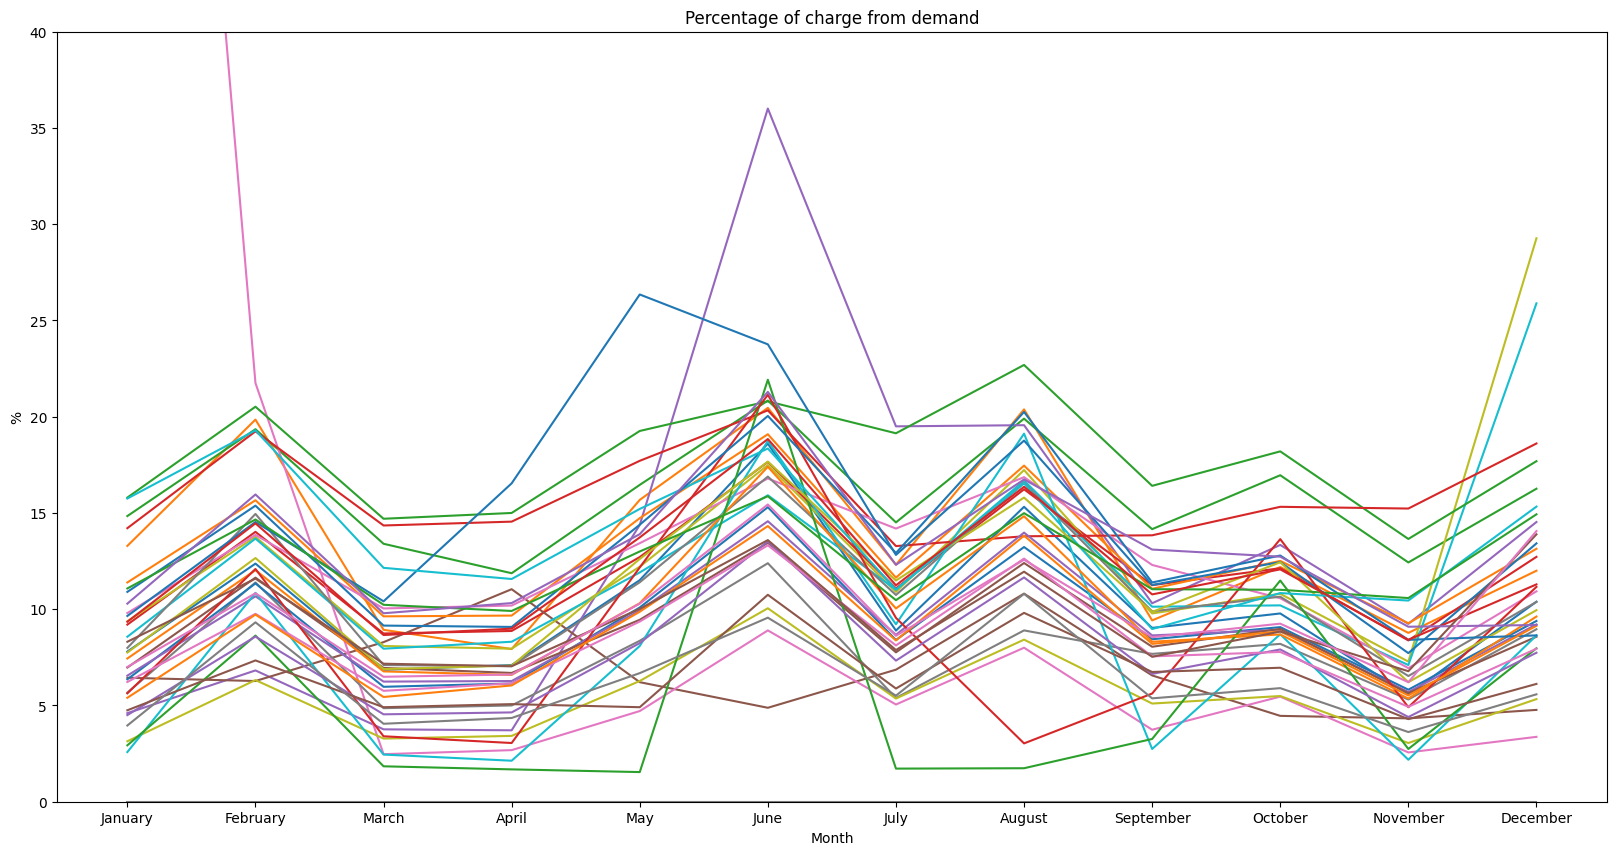

In [ ]:
demand_percentages = np.array(cost_df[cost_df.columns[2::3]])
plt.figure(figsize = (20, 10))
for b in range(buildings):
  plt.plot(np.arange(1, 13), demand_percentages[:, b])
  plt.ylim((0, 40))
  plt.xlabel("Month")
  plt.xticks(np.arange(1, 13), month_labels)
  plt.title("Percentage of charge from demand")
  plt.ylabel("%")